# Pandas and Data Science
In this course, we'll rely on the pandas library. The industry standard for data manipulation, it will be integral to our later work with regression and plotting. The goal of this lab is to showcase the primary differences between datascience and pandas. If you notice similarities between the two libraries' approaches, it'
s because datascience is actually built on top of pandas! To start, load in both libraries

In [79]:
from datascience import Table
import pandas as pd
%matplotlib inline

How do we create a table? The process is similar, although in pandas you're encouraged to use dictionaries rather than the list-of-lists approach in datascience

In [126]:
t = Table().with_columns([
       'letter', ['a', 'b', 'c', 'z'],
       'count',  [  9,   3,   3,   1],
       'points', [  1,   2,   2,  10],
   ])
t

letter,count,points
a,9,1
b,3,2
c,3,2
z,1,10


In [127]:
pd_t = pd.DataFrame({
        'letter': ['a', 'b', 'c', 'z'],
        'count':  [  9,   3,   3,   1],
        'points': [  1,   2,   2,  10]
        })
pd_t

,letter,count,points
0,a,9,1
1,b,3,2
2,c,3,2
3,z,1,10


For the rest of the lab, we will work with ProPublica Senate data. To begin, notice that reading in a CSV is remarkably similar.

In [34]:
senator_table = Table.read_table('data/members.csv')
senator_table

short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,facebook_account,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
Sen.,Lamar,Alexander,1940-07-03,M,R,SenAlexander,senatorlamaralexander,0.324,18.55,96.55,3.45
Sen.,Tammy,Baldwin,1962-02-11,F,D,SenatorBaldwin,senatortammybaldwin,-0.493,0.28,94.65,5.35
Sen.,John,Barrasso,1952-07-21,M,R,SenJohnBarrasso,johnbarrasso,0.541,0,96.91,3.09
Sen.,Michael,Bennet,1964-11-28,M,D,SenBennetCo,senbennetco,-0.227,17.99,94.91,5.09
Sen.,Marsha,Blackburn,1952-06-06,F,R,MarshaBlackburn,marshablackburn,0.619,1.67,94.01,5.99
Sen.,Richard,Blumenthal,1946-02-13,M,D,SenBlumenthal,SenBlumenthal,-0.438,0.98,88.37,11.63
Sen.,Roy,Blunt,1950-01-10,M,R,RoyBlunt,SenatorBlunt,0.426,2.09,98.28,1.72
Sen.,Cory,Booker,1969-04-27,M,D,SenBooker,nan,-0.592,40.45,83.37,16.63
Sen.,John,Boozman,1950-12-10,M,R,JohnBoozman,JohnBoozman,0.4,0,98.46,1.54
Sen.,Mike,Braun,1954-03-24,M,R,SenatorBraun,nan,nan,0.84,93.21,6.79


In [35]:
senator_df = pd.read_csv('data/members.csv')
senator_df

,short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,facebook_account,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
0,Sen.,Lamar,Alexander,1940-07-03,M,R,SenAlexander,senatorlamaralexander,0.324,18.55,96.55,3.45
1,Sen.,Tammy,Baldwin,1962-02-11,F,D,SenatorBaldwin,senatortammybaldwin,-0.493,0.28,94.65,5.35
2,Sen.,John,Barrasso,1952-07-21,M,R,SenJohnBarrasso,johnbarrasso,0.541,0.00,96.91,3.09
3,Sen.,Michael,Bennet,1964-11-28,M,D,SenBennetCo,senbennetco,-0.227,17.99,94.91,5.09
4,Sen.,Marsha,Blackburn,1952-06-06,F,R,MarshaBlackburn,marshablackburn,0.619,1.67,94.01,5.99
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Sen.,Elizabeth,Warren,1949-06-22,F,D,SenWarren,senatorelizabethwarren,-0.771,39.47,78.67,21.33
98,Sen.,Sheldon,Whitehouse,1955-10-20,M,D,SenWhitehouse,SenatorWhitehouse,-0.354,8.09,93.63,6.37
99,Sen.,Roger,Wicker,1951-07-05,M,R,SenatorWicker,SenatorWicker,0.376,0.14,98.73,1.27
100,Sen.,Ron,Wyden,1949-05-03,M,D,RonWyden,NaN,-0.330,1.53,85.36,14.64


Accessing a single column has two separate methods in datascience. The first, `.column`, returns an array of the values. The second, `.select`, returns the actual column as a miniature table. Meanwhile, pandas selection returns a single list of the values.

In [128]:
senator_table.column('twitter_account')

array(['SenAlexander', 'SenatorBaldwin', 'SenJohnBarrasso', 'SenBennetCo',
       'MarshaBlackburn', 'SenBlumenthal', 'RoyBlunt', 'SenBooker',
       'JohnBoozman', 'SenatorBraun', 'SenSherrodBrown', 'SenatorBurr',
       'SenatorCantwell', 'SenCapito', 'SenatorCardin', 'SenatorCarper',
       'SenBobCasey', 'nan', 'SenatorCollins', 'ChrisCoons', 'JohnCornyn',
       'sencortezmasto', 'SenTomCotton', 'SenKevinCramer', 'MikeCrapo',
       'SenTedCruz', 'SteveDaines', 'SenDuckworth', 'SenatorDurbin',
       'SenatorEnzi', 'SenJoniErnst', 'SenFeinstein', 'SenatorFischer',
       'SenCoryGardner', 'GillibrandNY', 'GrahamBlog', 'ChuckGrassley',
       'SenKamalaHarris', 'Senatorhassan', 'SenHawleyPress',
       'MartinHeinrich', 'MazieHirono', 'SenJohnHoeven', 'SenHydeSmith',
       'InhofePress', 'SenatorIsakson', 'SenRonJohnson', 'sendougjones',
       'nan', 'SenMarkKelly', 'SenJohnKennedy', 'SenAngusKing',
       'SenAmyKlobuchar', 'SenatorLankford', 'SenatorLeahy', 'SenMikeLee',
      

In [129]:
senator_table.select('twitter_account')

twitter_account
SenAlexander
SenatorBaldwin
SenJohnBarrasso
SenBennetCo
MarshaBlackburn
SenBlumenthal
RoyBlunt
SenBooker
JohnBoozman
SenatorBraun


In [130]:
senator_df['twitter_account']

0         SenAlexander
1       SenatorBaldwin
2      SenJohnBarrasso
3          SenBennetCo
4      MarshaBlackburn
            ...       
97           SenWarren
98       SenWhitehouse
99       SenatorWicker
100           RonWyden
101       SenToddYoung
Name: twitter_account, Length: 102, dtype: object

Just like with column selection, datascience can return either the values or a slice of the actual table. In pandas, row selection returns the values as a list.

In [131]:
senator_table.rows[0]

Row(short_title='Sen.', first_name='Lamar', last_name='Alexander', date_of_birth='1940-07-03', gender='M', party='R', twitter_account='SenAlexander', facebook_account='senatorlamaralexander', dw_nominate=0.324, missed_votes_pct=18.55, votes_with_party_pct=96.55, votes_against_party_pct=3.45)

In [132]:
senator_table.take(0)

short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,facebook_account,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
Sen.,Lamar,Alexander,1940-07-03,M,R,SenAlexander,senatorlamaralexander,0.324,18.55,96.55,3.45


In [133]:
senator_df.loc[0]

short_title                                 Sen.
first_name                                 Lamar
last_name                              Alexander
date_of_birth                         1940-07-03
gender                                         M
party                                          R
twitter_account                     SenAlexander
facebook_account           senatorlamaralexander
dw_nominate                                0.324
missed_votes_pct                           18.55
votes_with_party_pct                       96.55
votes_against_party_pct                     3.45
Name: 0, dtype: object

To see the size of our table, datascience requires a method call to `num_rows` and `num_columns`. pandas's `.shape` returns a list of (number of rows, number of columns)

In [77]:
senator_table.num_rows, senator_table.num_columns

(102, 12)

In [47]:
senator_df.shape

(102, 12)

Relabeling columns is similar in both libraries, although pandas requires specifying that you're changing the columns.

In [134]:
senator_table.relabeled('facebook_account', 'fb')

short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,fb,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
Sen.,Lamar,Alexander,1940-07-03,M,R,SenAlexander,senatorlamaralexander,0.324,18.55,96.55,3.45
Sen.,Tammy,Baldwin,1962-02-11,F,D,SenatorBaldwin,senatortammybaldwin,-0.493,0.28,94.65,5.35
Sen.,John,Barrasso,1952-07-21,M,R,SenJohnBarrasso,johnbarrasso,0.541,0,96.91,3.09
Sen.,Michael,Bennet,1964-11-28,M,D,SenBennetCo,senbennetco,-0.227,17.99,94.91,5.09
Sen.,Marsha,Blackburn,1952-06-06,F,R,MarshaBlackburn,marshablackburn,0.619,1.67,94.01,5.99
Sen.,Richard,Blumenthal,1946-02-13,M,D,SenBlumenthal,SenBlumenthal,-0.438,0.98,88.37,11.63
Sen.,Roy,Blunt,1950-01-10,M,R,RoyBlunt,SenatorBlunt,0.426,2.09,98.28,1.72
Sen.,Cory,Booker,1969-04-27,M,D,SenBooker,nan,-0.592,40.45,83.37,16.63
Sen.,John,Boozman,1950-12-10,M,R,JohnBoozman,JohnBoozman,0.4,0,98.46,1.54
Sen.,Mike,Braun,1954-03-24,M,R,SenatorBraun,nan,nan,0.84,93.21,6.79


In [135]:
senator_df.rename(columns={"facebook_account":'fb'})

,short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,fb,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
0,Sen.,Lamar,Alexander,1940-07-03,M,R,SenAlexander,senatorlamaralexander,0.324,18.55,96.55,3.45
1,Sen.,Tammy,Baldwin,1962-02-11,F,D,SenatorBaldwin,senatortammybaldwin,-0.493,0.28,94.65,5.35
2,Sen.,John,Barrasso,1952-07-21,M,R,SenJohnBarrasso,johnbarrasso,0.541,0.00,96.91,3.09
3,Sen.,Michael,Bennet,1964-11-28,M,D,SenBennetCo,senbennetco,-0.227,17.99,94.91,5.09
4,Sen.,Marsha,Blackburn,1952-06-06,F,R,MarshaBlackburn,marshablackburn,0.619,1.67,94.01,5.99
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Sen.,Elizabeth,Warren,1949-06-22,F,D,SenWarren,senatorelizabethwarren,-0.771,39.47,78.67,21.33
98,Sen.,Sheldon,Whitehouse,1955-10-20,M,D,SenWhitehouse,SenatorWhitehouse,-0.354,8.09,93.63,6.37
99,Sen.,Roger,Wicker,1951-07-05,M,R,SenatorWicker,SenatorWicker,0.376,0.14,98.73,1.27
100,Sen.,Ron,Wyden,1949-05-03,M,D,RonWyden,NaN,-0.330,1.53,85.36,14.64


Creating a filtered version of the data requires the `.where` method in datascience. In pandas, it is similar to previous accessors, albeit with the condition added rather than the specific row or column value.

In [63]:
senator_table.where('gender', 'M')

short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,facebook_account,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
Sen.,Lamar,Alexander,1940-07-03,M,R,SenAlexander,senatorlamaralexander,0.324,18.55,96.55,3.45
Sen.,John,Barrasso,1952-07-21,M,R,SenJohnBarrasso,johnbarrasso,0.541,0,96.91,3.09
Sen.,Michael,Bennet,1964-11-28,M,D,SenBennetCo,senbennetco,-0.227,17.99,94.91,5.09
Sen.,Richard,Blumenthal,1946-02-13,M,D,SenBlumenthal,SenBlumenthal,-0.438,0.98,88.37,11.63
Sen.,Roy,Blunt,1950-01-10,M,R,RoyBlunt,SenatorBlunt,0.426,2.09,98.28,1.72
Sen.,Cory,Booker,1969-04-27,M,D,SenBooker,nan,-0.592,40.45,83.37,16.63
Sen.,John,Boozman,1950-12-10,M,R,JohnBoozman,JohnBoozman,0.4,0,98.46,1.54
Sen.,Mike,Braun,1954-03-24,M,R,SenatorBraun,nan,nan,0.84,93.21,6.79
Sen.,Sherrod,Brown,1952-11-09,M,D,SenSherrodBrown,SenatorSherrodBrown,-0.428,1.67,91.96,8.04
Sen.,Richard,Burr,1955-11-30,M,R,SenatorBurr,SenatorRichardBurr,0.45,12.27,98.4,1.6


In [64]:
senator_df[senator_df['gender'] == 'M']

,short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,facebook_account,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
0,Sen.,Lamar,Alexander,1940-07-03,M,R,SenAlexander,senatorlamaralexander,0.324,18.55,96.55,3.45
2,Sen.,John,Barrasso,1952-07-21,M,R,SenJohnBarrasso,johnbarrasso,0.541,0.00,96.91,3.09
3,Sen.,Michael,Bennet,1964-11-28,M,D,SenBennetCo,senbennetco,-0.227,17.99,94.91,5.09
5,Sen.,Richard,Blumenthal,1946-02-13,M,D,SenBlumenthal,SenBlumenthal,-0.438,0.98,88.37,11.63
6,Sen.,Roy,Blunt,1950-01-10,M,R,RoyBlunt,SenatorBlunt,0.426,2.09,98.28,1.72
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Sen.,Mark,Warner,1954-12-15,M,D,MarkWarner,MarkRWarner,-0.201,2.79,93.62,6.38
98,Sen.,Sheldon,Whitehouse,1955-10-20,M,D,SenWhitehouse,SenatorWhitehouse,-0.354,8.09,93.63,6.37
99,Sen.,Roger,Wicker,1951-07-05,M,R,SenatorWicker,SenatorWicker,0.376,0.14,98.73,1.27
100,Sen.,Ron,Wyden,1949-05-03,M,D,RonWyden,NaN,-0.330,1.53,85.36,14.64


You'll notice that for more complicated filters, datascience quickly starts to look like pandas. In this case, we create a subset of the table that contains only senators who voted with their party more than 96% of the time

In [68]:
senator_table.where(senator_table.column('votes_with_party_pct') > 96)

short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,facebook_account,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
Sen.,Lamar,Alexander,1940-07-03,M,R,SenAlexander,senatorlamaralexander,0.324,18.55,96.55,3.45
Sen.,John,Barrasso,1952-07-21,M,R,SenJohnBarrasso,johnbarrasso,0.541,0,96.91,3.09
Sen.,Roy,Blunt,1950-01-10,M,R,RoyBlunt,SenatorBlunt,0.426,2.09,98.28,1.72
Sen.,John,Boozman,1950-12-10,M,R,JohnBoozman,JohnBoozman,0.4,0,98.46,1.54
Sen.,Richard,Burr,1955-11-30,M,R,SenatorBurr,SenatorRichardBurr,0.45,12.27,98.4,1.6
Sen.,Shelley,Capito,1953-11-26,F,R,SenCapito,senshelley,0.263,5.44,98.52,1.48
Sen.,Bill,Cassidy,1957-09-28,M,R,nan,nan,0.456,6.42,97,3
Sen.,John,Cornyn,1952-02-02,M,R,JohnCornyn,sen.johncornyn,0.492,0.98,98.02,1.98
Sen.,Tom,Cotton,1977-05-13,M,R,SenTomCotton,SenatorTomCotton,0.573,0.7,97.17,2.83
Sen.,Kevin,Cramer,1961-01-21,M,R,SenKevinCramer,CongressmanKevinCramer,0.388,2.65,99.28,0.72


In [69]:
senator_df[senator_df['votes_with_party_pct'] > 96]

,short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,facebook_account,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
0,Sen.,Lamar,Alexander,1940-07-03,M,R,SenAlexander,senatorlamaralexander,0.324,18.55,96.55,3.45
2,Sen.,John,Barrasso,1952-07-21,M,R,SenJohnBarrasso,johnbarrasso,0.541,0.00,96.91,3.09
6,Sen.,Roy,Blunt,1950-01-10,M,R,RoyBlunt,SenatorBlunt,0.426,2.09,98.28,1.72
8,Sen.,John,Boozman,1950-12-10,M,R,JohnBoozman,JohnBoozman,0.400,0.00,98.46,1.54
11,Sen.,Richard,Burr,1955-11-30,M,R,SenatorBurr,SenatorRichardBurr,0.450,12.27,98.40,1.60
13,Sen.,Shelley,Capito,1953-11-26,F,R,SenCapito,senshelley,0.263,5.44,98.52,1.48
17,Sen.,Bill,Cassidy,1957-09-28,M,R,NaN,NaN,0.456,6.42,97.00,3.00
20,Sen.,John,Cornyn,1952-02-02,M,R,JohnCornyn,sen.johncornyn,0.492,0.98,98.02,1.98
22,Sen.,Tom,Cotton,1977-05-13,M,R,SenTomCotton,SenatorTomCotton,0.573,0.70,97.17,2.83
23,Sen.,Kevin,Cramer,1961-01-21,M,R,SenKevinCramer,CongressmanKevinCramer,0.388,2.65,99.28,0.72


To sort a datascience table, use the column you wish to sort by and the optional `descending` value. The only difference between the two libraries is that datascience uses `descending` while pandas uses `ascending` to differentiate sorting method.

In [70]:
senator_table.sort('votes_with_party_pct')

short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,facebook_account,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
Sen.,Mark,Kelly,1964-02-21,M,D,SenMarkKelly,SenMarkKelly,nan,0,65.12,34.88
Sen.,Joe,Manchin,1947-08-24,M,D,Sen_JoeManchin,JoeManchinIII,-0.056,1.95,74.37,25.63
Sen.,Edward,Markey,1946-07-11,M,D,SenMarkey,EdJMarkey,-0.512,10.88,74.8,25.2
Sen.,Kirsten,Gillibrand,1966-12-09,F,D,GillibrandNY,SenKirstenGillibrand,-0.475,15.34,76.4,23.6
Sen.,Kamala,Harris,1964-10-20,F,D,SenKamalaHarris,SenatorKamalaHarris,-0.709,55.23,76.85,23.15
Sen.,Kyrsten,Sinema,1976-07-12,F,D,SenatorSinema,CongresswomanSinema,-0.101,8.37,77.08,22.92
Sen.,Elizabeth,Warren,1949-06-22,F,D,SenWarren,senatorelizabethwarren,-0.771,39.47,78.67,21.33
Sen.,Doug,Jones,1954-05-04,M,D,sendougjones,senatordougjones,-0.088,4.88,78.76,21.24
Sen.,Rand,Paul,1963-01-07,M,R,RandPaul,SenatorRandPaul,0.876,9.34,80.16,19.84
Sen.,Bernard,Sanders,1941-09-08,M,ID,SenSanders,senatorsanders,-0.529,57.32,80.73,19.27


In [71]:
senator_table.sort('votes_with_party_pct', descending=True)

short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,facebook_account,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
Sen.,Kevin,Cramer,1961-01-21,M,R,SenKevinCramer,CongressmanKevinCramer,0.388,2.65,99.28,0.72
Sen.,John,Thune,1961-01-07,M,R,SenJohnThune,nan,0.411,0.42,99.01,0.99
Sen.,John,Hoeven,1957-03-13,M,R,SenJohnHoeven,SenatorJohnHoeven,0.343,1.53,99,1
Sen.,Roger,Wicker,1951-07-05,M,R,SenatorWicker,SenatorWicker,0.376,0.14,98.73,1.27
Sen.,Johnny,Isakson,1944-12-28,M,R,SenatorIsakson,nan,0.402,33.49,98.59,1.41
Sen.,Pat,Roberts,1936-04-20,M,R,SenPatRoberts,SenPatRoberts,0.413,5.03,98.52,1.48
Sen.,Shelley,Capito,1953-11-26,F,R,SenCapito,senshelley,0.263,5.44,98.52,1.48
Sen.,John,Boozman,1950-12-10,M,R,JohnBoozman,JohnBoozman,0.4,0,98.46,1.54
Sen.,Richard,Burr,1955-11-30,M,R,SenatorBurr,SenatorRichardBurr,0.45,12.27,98.4,1.6
Sen.,Cindy,Hyde-Smith,1959-05-10,F,R,SenHydeSmith,nan,0.374,1.67,98.29,1.71


In [72]:
senator_df.sort_values('votes_with_party_pct')

,short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,facebook_account,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
49,Sen.,Mark,Kelly,1964-02-21,M,D,SenMarkKelly,SenMarkKelly,NaN,0.00,65.12,34.88
57,Sen.,Joe,Manchin,1947-08-24,M,D,Sen_JoeManchin,JoeManchinIII,-0.056,1.95,74.37,25.63
58,Sen.,Edward,Markey,1946-07-11,M,D,SenMarkey,EdJMarkey,-0.512,10.88,74.80,25.20
34,Sen.,Kirsten,Gillibrand,1966-12-09,F,D,GillibrandNY,SenKirstenGillibrand,-0.475,15.34,76.40,23.60
37,Sen.,Kamala,Harris,1964-10-20,F,D,SenKamalaHarris,SenatorKamalaHarris,-0.709,55.23,76.85,23.15
...,...,...,...,...,...,...,...,...,...,...,...,...
45,Sen.,Johnny,Isakson,1944-12-28,M,R,SenatorIsakson,NaN,0.402,33.49,98.59,1.41
99,Sen.,Roger,Wicker,1951-07-05,M,R,SenatorWicker,SenatorWicker,0.376,0.14,98.73,1.27
42,Sen.,John,Hoeven,1957-03-13,M,R,SenJohnHoeven,SenatorJohnHoeven,0.343,1.53,99.00,1.00
91,Sen.,John,Thune,1961-01-07,M,R,SenJohnThune,NaN,0.411,0.42,99.01,0.99


In [76]:
senator_df.sort_values('votes_with_party_pct', ascending=False)

,short_title,first_name,last_name,date_of_birth,gender,party,twitter_account,facebook_account,dw_nominate,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
23,Sen.,Kevin,Cramer,1961-01-21,M,R,SenKevinCramer,CongressmanKevinCramer,0.388,2.65,99.28,0.72
91,Sen.,John,Thune,1961-01-07,M,R,SenJohnThune,NaN,0.411,0.42,99.01,0.99
42,Sen.,John,Hoeven,1957-03-13,M,R,SenJohnHoeven,SenatorJohnHoeven,0.343,1.53,99.00,1.00
99,Sen.,Roger,Wicker,1951-07-05,M,R,SenatorWicker,SenatorWicker,0.376,0.14,98.73,1.27
45,Sen.,Johnny,Isakson,1944-12-28,M,R,SenatorIsakson,NaN,0.402,33.49,98.59,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...
37,Sen.,Kamala,Harris,1964-10-20,F,D,SenKamalaHarris,SenatorKamalaHarris,-0.709,55.23,76.85,23.15
34,Sen.,Kirsten,Gillibrand,1966-12-09,F,D,GillibrandNY,SenKirstenGillibrand,-0.475,15.34,76.40,23.60
58,Sen.,Edward,Markey,1946-07-11,M,D,SenMarkey,EdJMarkey,-0.512,10.88,74.80,25.20
57,Sen.,Joe,Manchin,1947-08-24,M,D,Sen_JoeManchin,JoeManchinIII,-0.056,1.95,74.37,25.63


We can plot a column in the datascience table fairly easily:

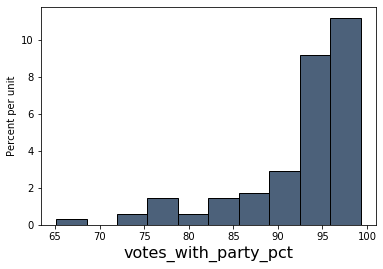

In [137]:
senator_table.hist('votes_with_party_pct')

With pandas, the easiest method is to select the specifc column, and then call the `hist` function.

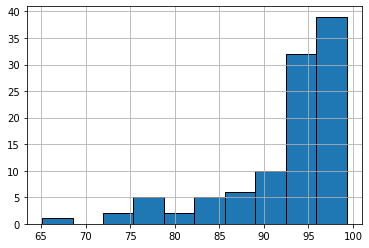

In [145]:
senator_df['votes_with_party_pct'].hist()

While the basic plot is a little easier with datascience, pandas allows for easier plotting of all relevant columns. In the next two cells, note what happens when we call `hist` on the entire datascience table compared to the entire pandas DataFrame (you can ignore the figsize parameter, it's just to make the plots more readable).

In [148]:
senator_table.hist()

ValueError: The column 'short_title' contains non-numerical values. A histogram cannot be drawn for this table.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd624e08290>,
      dtype=object)

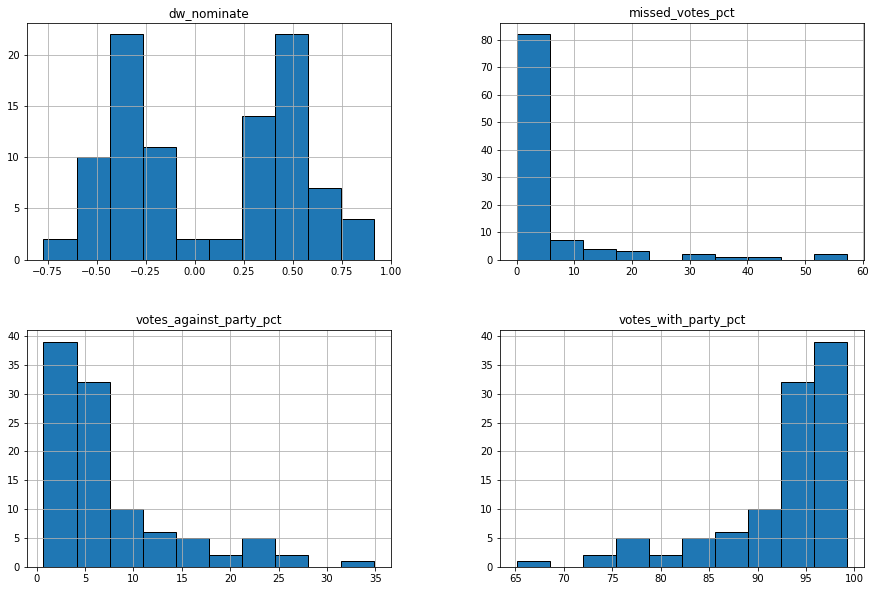

In [149]:
senator_df.hist(figsize=(15,10))

Plotting a relationship is easier with datascience: with pandas, you need to sort the DataFrame by the x-axis column for the plot to be legible (try removing `.sort_values('dw_nominate')`)

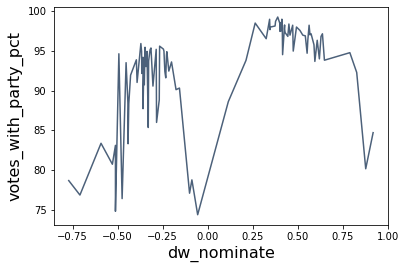

In [152]:
senator_table.plot('dw_nominate', 'votes_with_party_pct')

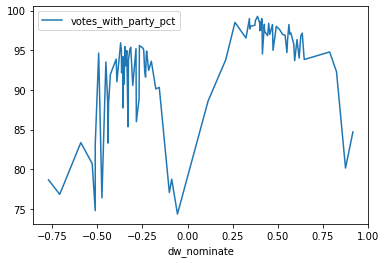

In [153]:
senator_df.sort_values('dw_nominate').plot('dw_nominate', 'votes_with_party_pct')

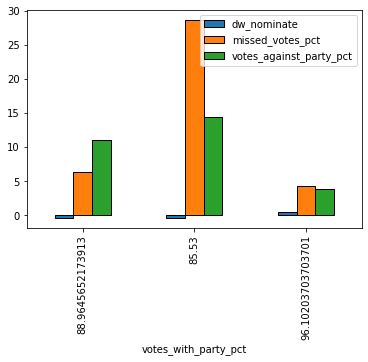